In [1]:
# Установка библиотеки PyTorch.
!pip3 install torch

In [2]:
import torch
print(torch.__version__)

2.9.0+cpu


# Обучение нейронной сети

## Ирисы Фишера

### Набор данных

 Вы будете работать с известным набором данных для тестирования моделей, чтобы решить задачу классификации [«Ирисы Фишера»](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0).

 Набор состоит из информации о 150
 различных цветках ирисов, для каждого из которых известны следующие характеристики:

 1. Длина чашелистика (sepal length), см.
 1. Ширина чашелистика (sepal width), см.
 1. Длина лепестка (petal length), см.
 1. Ширина лепестка (petal width), см.

 Также для каждого из цветков известен один из трёх классов, которому он принадлежит:

 1. Ирис щетинистый (setosa).
 1. Ирис виргинский (virginica).
 1. Ирис разноцветный (versicolor).

 При решении задачи классификации, которая задаётся этим набором данных, нужно научиться по нескольким характеристикам цветка определять, к какому классу он принадлежит.

### Ирисы Фишера в Python

В Python ирисы Фишера доступны в библиотеке `sklearn`:

```
from sklearn import datasets

# в переменную будет сохранён объект «набор данных «Ирисы Фишера»
data = datasets.load_iris()  
```

Чтобы преобразовать набор данных к виду, в котором его будет удобно использовать при создании моделей в PyTorch, необходимо написать:


```
X = torch.tensor(data['data'])
y = torch.tensor(data['target'])
```

В результате в переменной $X$ будет находиться матрица размера $150 \times 4$, в которой каждая строчка соответствует конкретному цветку, а каждая из колонок — одной из его характеристик:

```
tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        ...
        [5.9000, 3.0000, 5.1000, 1.8000]], dtype=torch.float64)
```

В переменной $y$ будет находиться вектор размера $150$. На $i$-й позиции в векторе стоит значение класса для $i$-го цветка из матрицы $X$:


```
tensor([0, 0, 0, 0, ... 2, 2, 2, 2])
```



In [3]:
!pip3 install scikit-learn

In [4]:
import sklearn
from sklearn import datasets

In [ ]:
# TODO: Загрузите датасет "Ирисы Фишера"

In [5]:
data = datasets.load_iris()

In [ ]:
# TODO: Преобразуйте обучающую выборку в тензоры Pytorch,
#       в переменную X сохраните признаковое описание объекта - характеристики цветков Ириса,
#       в переменную y сохраните целевую переменную - классы цветков Ириса.

In [6]:
X = torch.tensor(data["data"], dtype=torch.float32)
Y = torch.tensor(data["target"], dtype = torch.long)

In [ ]:
# TODO: С помощью функции train_test_split() из sklearn.model_selection
#       разделите данные на обучающую и тестовую выборку,
#       отправив в тестовую часть 20% данных

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=8)
print(f"X_train: {X_train.shape}, {X_train.dtype}")
print(f"X_test: {X_test.shape}, {X_test.dtype}")
print(f"Y_train: {Y_train.shape}, {Y_train.dtype}")
print(f"Y_test: {Y_test.shape}, {Y_test.dtype}")

X_train: torch.Size([120, 4]), torch.float32
X_test: torch.Size([30, 4]), torch.float32
Y_train: torch.Size([120]), torch.int64
Y_test: torch.Size([30]), torch.int64


### Что нужно сделать?

В рамках задания вам будет необходимо реализовать нейронную сеть и обучить её для решения задачи классификации цветков из набора данных «Ирисы Фишера».

#### Создание нейронной сети

В этом блокноте ниже уже есть заготовка для решения задания.

В переменную $X$ помещена матрица с характеристиками цветков из набора, в переменную $y$ помещены значения классов, которые необходимо научиться предсказывать.

Вам необходимо заполнить пропущенные места в коде, придумав архитектуру нейронной сети, которая сможет решить поставленную задачу, а также запустить обучение полученной модели. Пропуски, которые необходимо заполнить, помечены комментарием TODO.

In [ ]:
from collections import OrderedDict

# TODO: Реализуйте модель нейронной сети и поместите её в эту переменную.
#       В качестве функции активации на последнем слое выберите torch.nn.LogSoftmax.
model = None

# Необходимо сообщить модели, с данными какого типа она будет работать.
model = model.to(dtype=X.dtype)

In [9]:
from collections import OrderedDict
model = torch.nn.Sequential(
    OrderedDict([
        ("linear_1", torch.nn.Linear(4, 32)),
        ("activation_1", torch.nn.ReLU()),
        ("linear_2", torch.nn.Linear(32, 3)),
        ("log_softmax", torch.nn.LogSoftmax(dim=1)),
    ])
)

In [10]:
model

Sequential(
  (linear_1): Linear(in_features=4, out_features=32, bias=True)
  (activation_1): ReLU()
  (linear_2): Linear(in_features=32, out_features=3, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

In [11]:
!pip3 install matplotlib

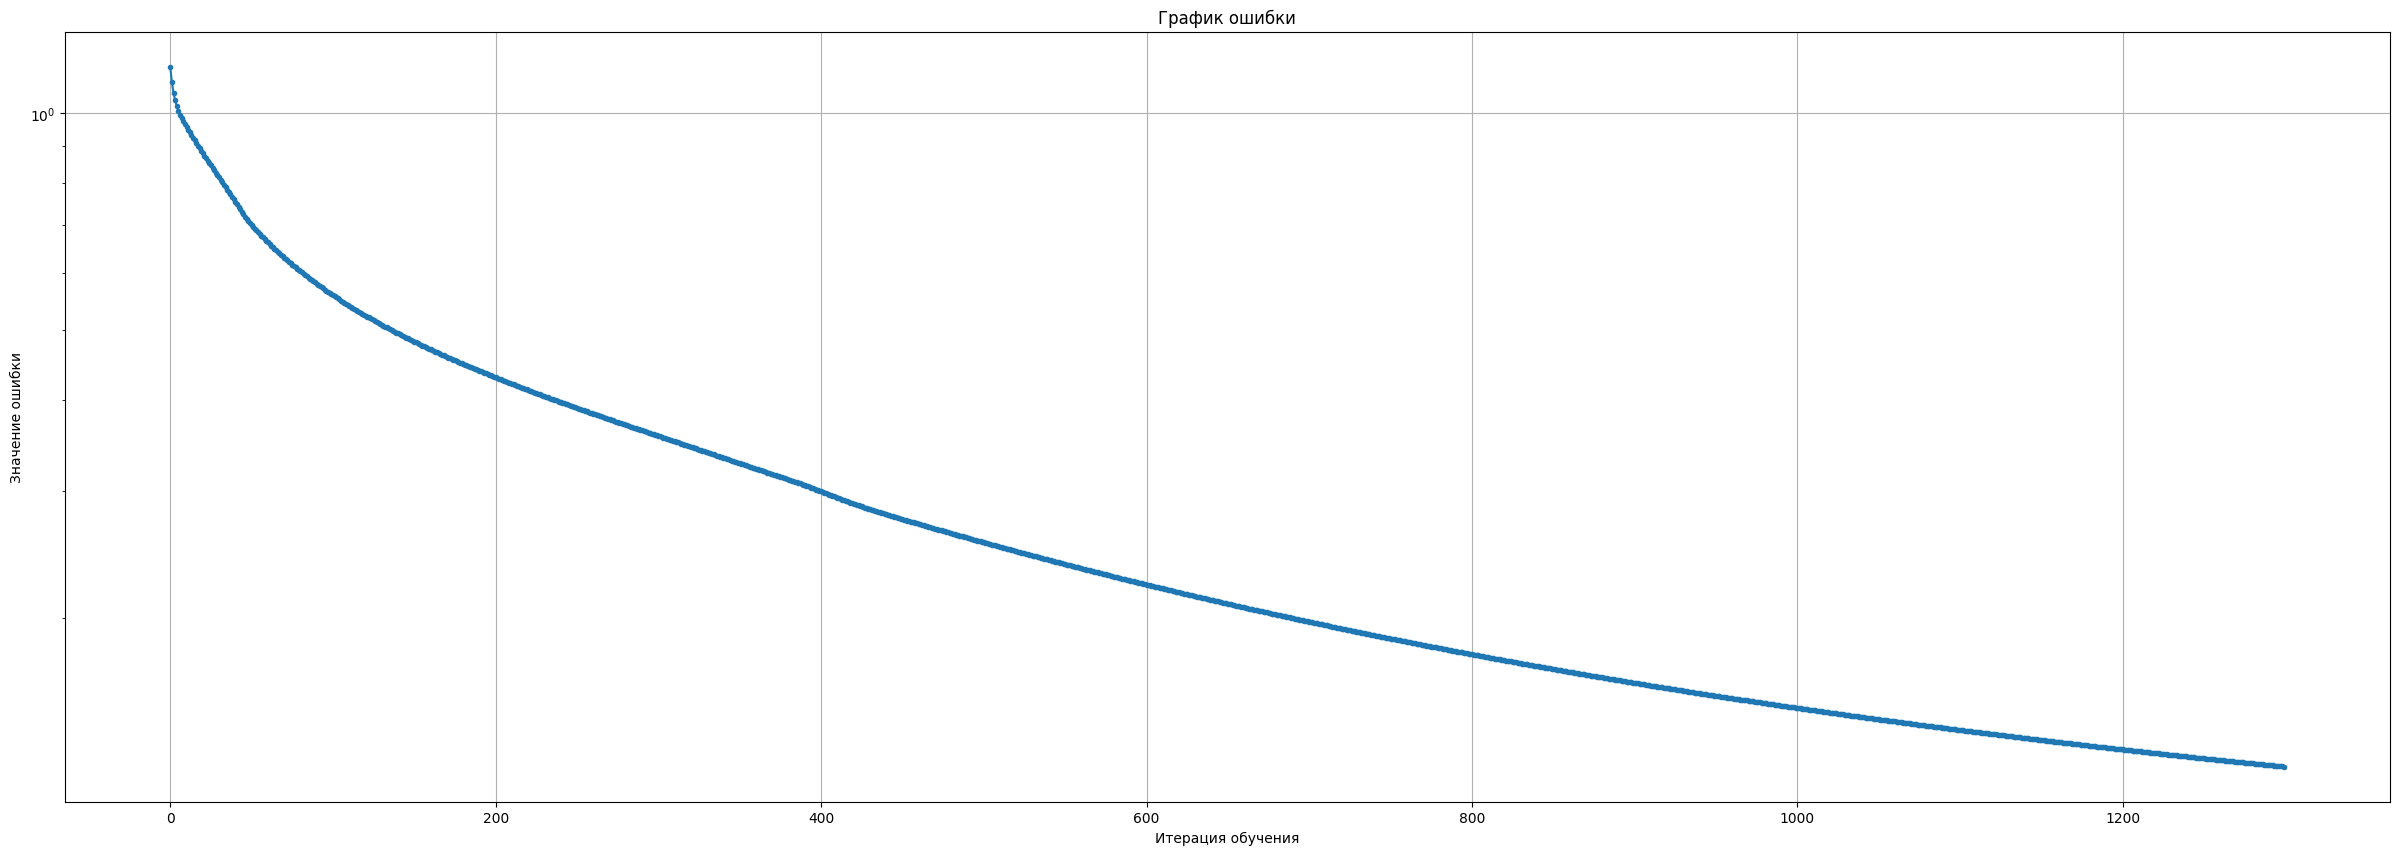

In [13]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Подберите число итераций обучения нейронной сети.
#       Значение числа итераций стоит выбрать большим 1000.
num_epochs = 1337

# TODO: Создайте оптимизатор SGD аналогично тому, как он задавался в лекции.
#       Не забудьте передать в него model.parameters().
#       В качестве величины шага обучения (параметр lr) возьмите значение 0.01.
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

# TODO: Задайте функцию потерь. В нашем случае это должна быть torch.nn.NLLLoss.
loss_fn = torch.nn.NLLLoss()

losses = []

test_accuracy_history = []

for epoch in range(1, num_epochs + 1):
    # TODO: Обнулите накопленное значение градиента с помощью фукции zero_grad объекта optimizer.
    #       Замените ключевое слово pass на необходимое выражение.
    pass
    optimizer.zero_grad()
    # TODO: Посчитайте предсказание модели для объектов из матрицы X.
    pred = model(X_train)
    # TODO: Посчитайте суммарные потери для предсказанных значений из pred.
    loss = loss_fn(pred, Y_train)

    # TODO: Рассчитайте градиенты loss по всем параметрам модели с помощью функции backward.
    #       Замените ключевое слово pass на необходимое выражение.
    pass
    loss.backward()
    # TODO: Произведите шаг оптимизации с помощью функции step объекта optimizer.
    #       Замените ключевое слово pass на необходимое выражение.
    pass
    optimizer.step()
    losses.append(loss.item())

    with torch.no_grad():
      test_preds = model.forward(X_test)
      accuracy = (test_preds.argmax(dim=1) == Y_test).float().mean().data.cpu()
      test_accuracy_history.append(accuracy)

    if epoch % 100 == 0:
        clear_output(True)
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.title("График ошибки")
        plt.plot(losses, ".-")
        plt.xlabel("Итерация обучения")
        plt.ylabel("Значение ошибки")
        plt.yscale("log")
        plt.grid()
        plt.show()

## Получение предсказания на тестовой выборке
В качестве ответа присвойте переменной y_pred список предсказанных классов для тестовыой выборки


In [14]:
# Модель для каждого объекта из тестовых данных возвращает вектор из 3-х численных значений,
# каждое из которых является логарифмом вероятности принадлежности объекта конкретному классу.
log_probs = model(X_test)

# Чтобы получить не логарифмы вероятностей, а сами вероятности,
# нужно поэлементно возвести экспоненту в степень логарифмов вероятности.
pred_class_probs = log_probs.exp()

# Для того чтобы понять, к какому классу модель отнесла тот или иной объект,
# нужно понять, какая координата соответствующего вектора предсказанных веряотностей имеет
# наибольшее значение. То есть к какому классу с точки зрения модели объект
# относится с наибольшей вероятностью.
# Чтобы выбрать номер координаты с наибольшим значением
# в каждой строчке матрицы log_probs, воспользуемся функцией torch.argmax.
# Значение ключевого парамтера dim указывает на то, что мы ищем наибольшее
# значение именно в каждой строчке.
pred_class = torch.argmax(log_probs, dim=1)

#### Ответ на тестовой выборке

In [15]:
print(pred_class)

tensor([0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1,
        1, 0, 2, 0, 0, 2])


Посчитайте точность предсказаний, как долю верно предсказанных ответов

In [ ]:
# ТОDO: посчитайте точность предсказаний

In [16]:
accuracy = (pred_class == Y_test).float().mean().item()
accuracy

0.9666666388511658